In [36]:
import sys
import time
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from scipy import signal


In [38]:
from matplotlib import rcParams
plt.style.use('seaborn-white')
rcParams['font.family'] = 'serif'

In [39]:
from data import *
from theta import *
from decoding import *
from plot import *

In [40]:
theta_thres = 20
corr_thres = 0.9

In [41]:
# Let's sort out some of these path issues
# TODO: Add option for Windows vs mac (python fullfile equ? )

dataPaths = {}
dataPaths['trial'] = 'D:\Documents\Data\processedHPC\{}\{}_trial_info.npy'
dataPaths['spike'] = 'D:\Documents\Data\processedHPC\{}\{}_spike_data_binned.npy'
dataPaths['lfp'] = 'D:\Documents\Data\processedHPC\{}\{}_lfp_data_sampled.npy'


In [42]:
# decode over multiple theta cycles
rat_name = 'Superchris'
start = time.time()
rp, target = multiple_theta_flow(dataPaths, rat_name)
print('Took: ', time.time()-start)

C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag

Took:  12.838541030883789


In [43]:
rp[:, :, :].shape

(168, 200, 4)

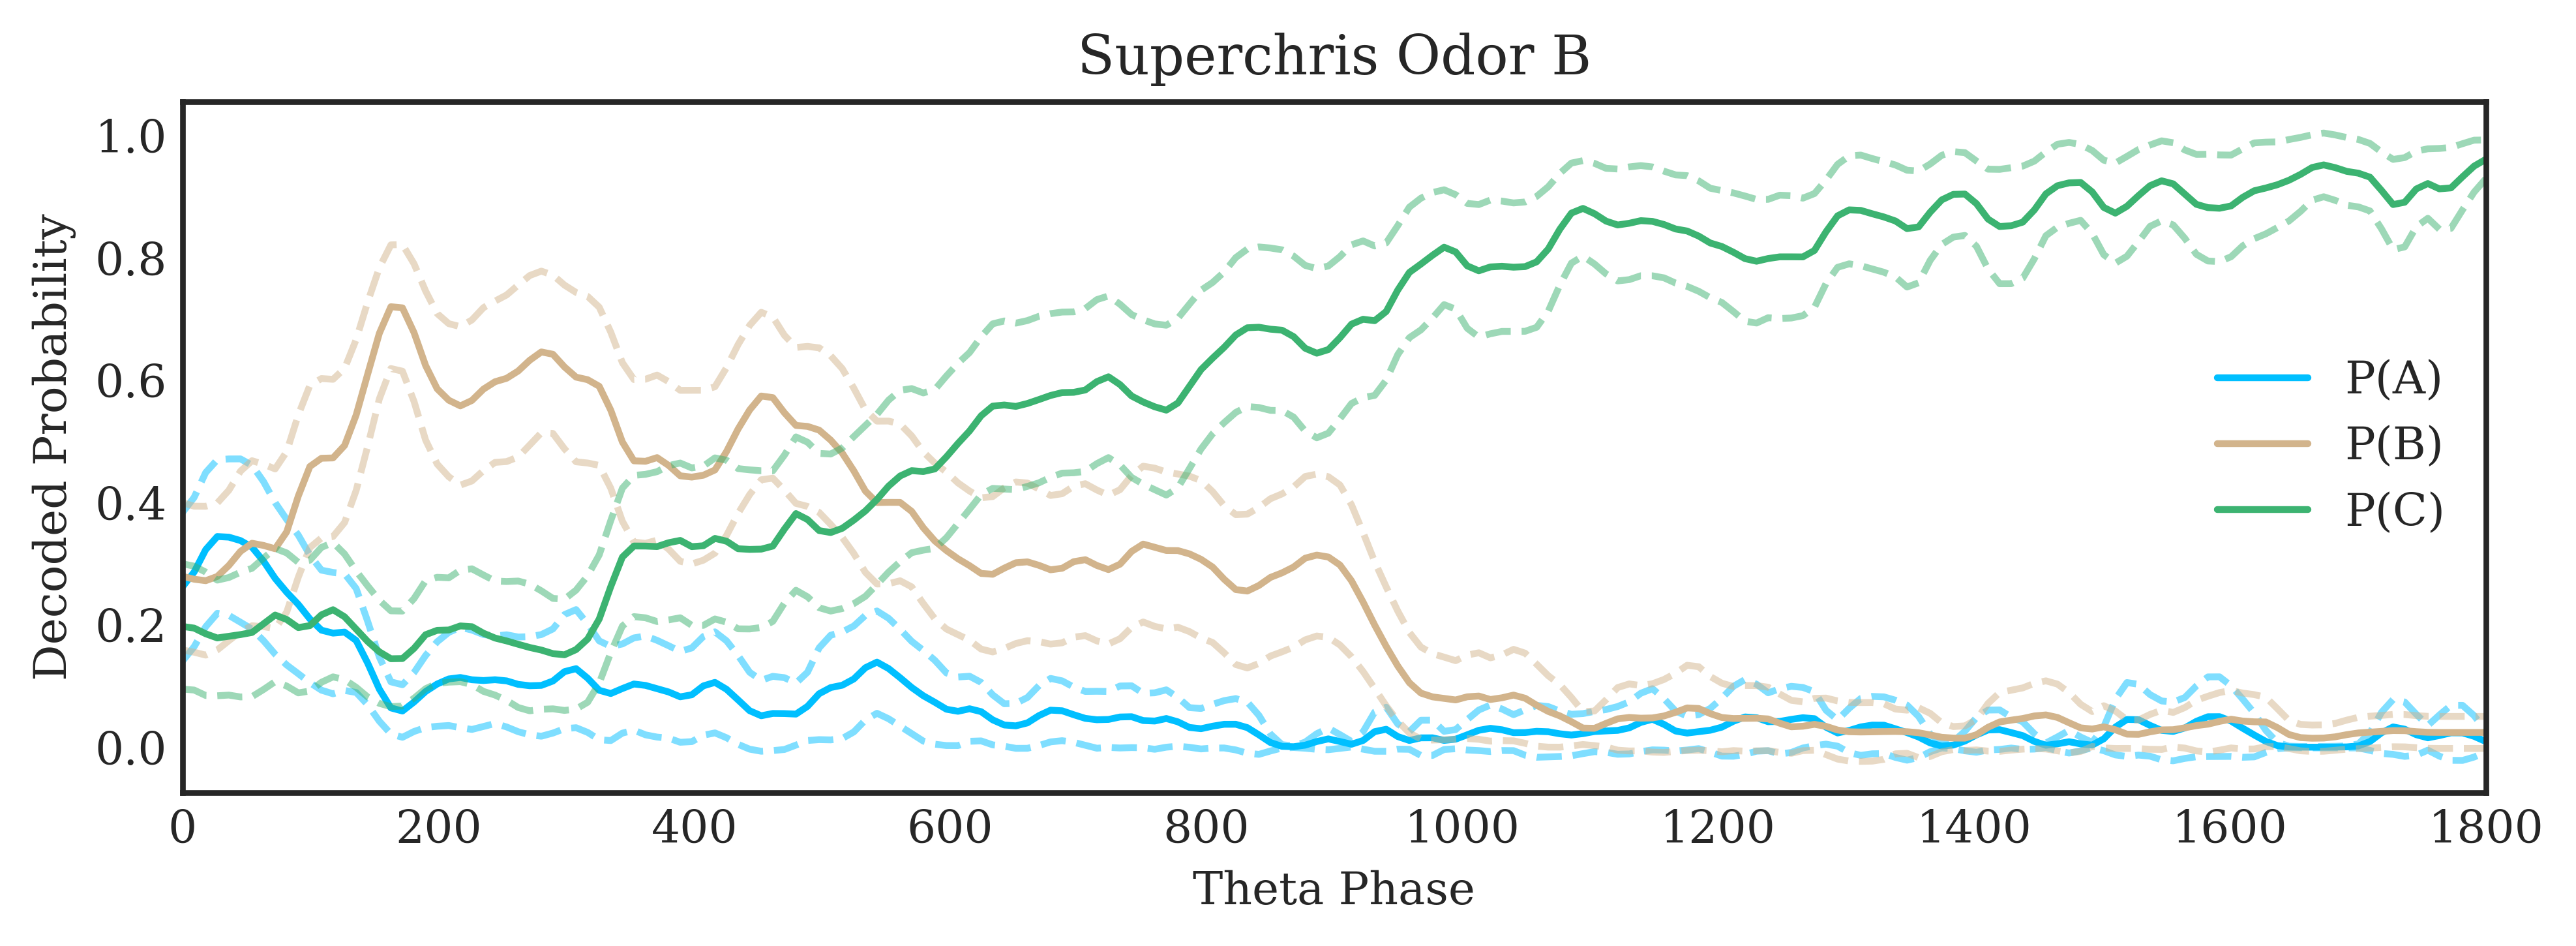

In [44]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=500)
odor_B_decoding_ext(rp[target == 1, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('odor_b_superchris.png', dpi=500)
#plt.savefig('odor_b_superchris.eps', format='eps', dpi=500)
plt.show()

NameError: name 'odor_c_decoding_ext' is not defined

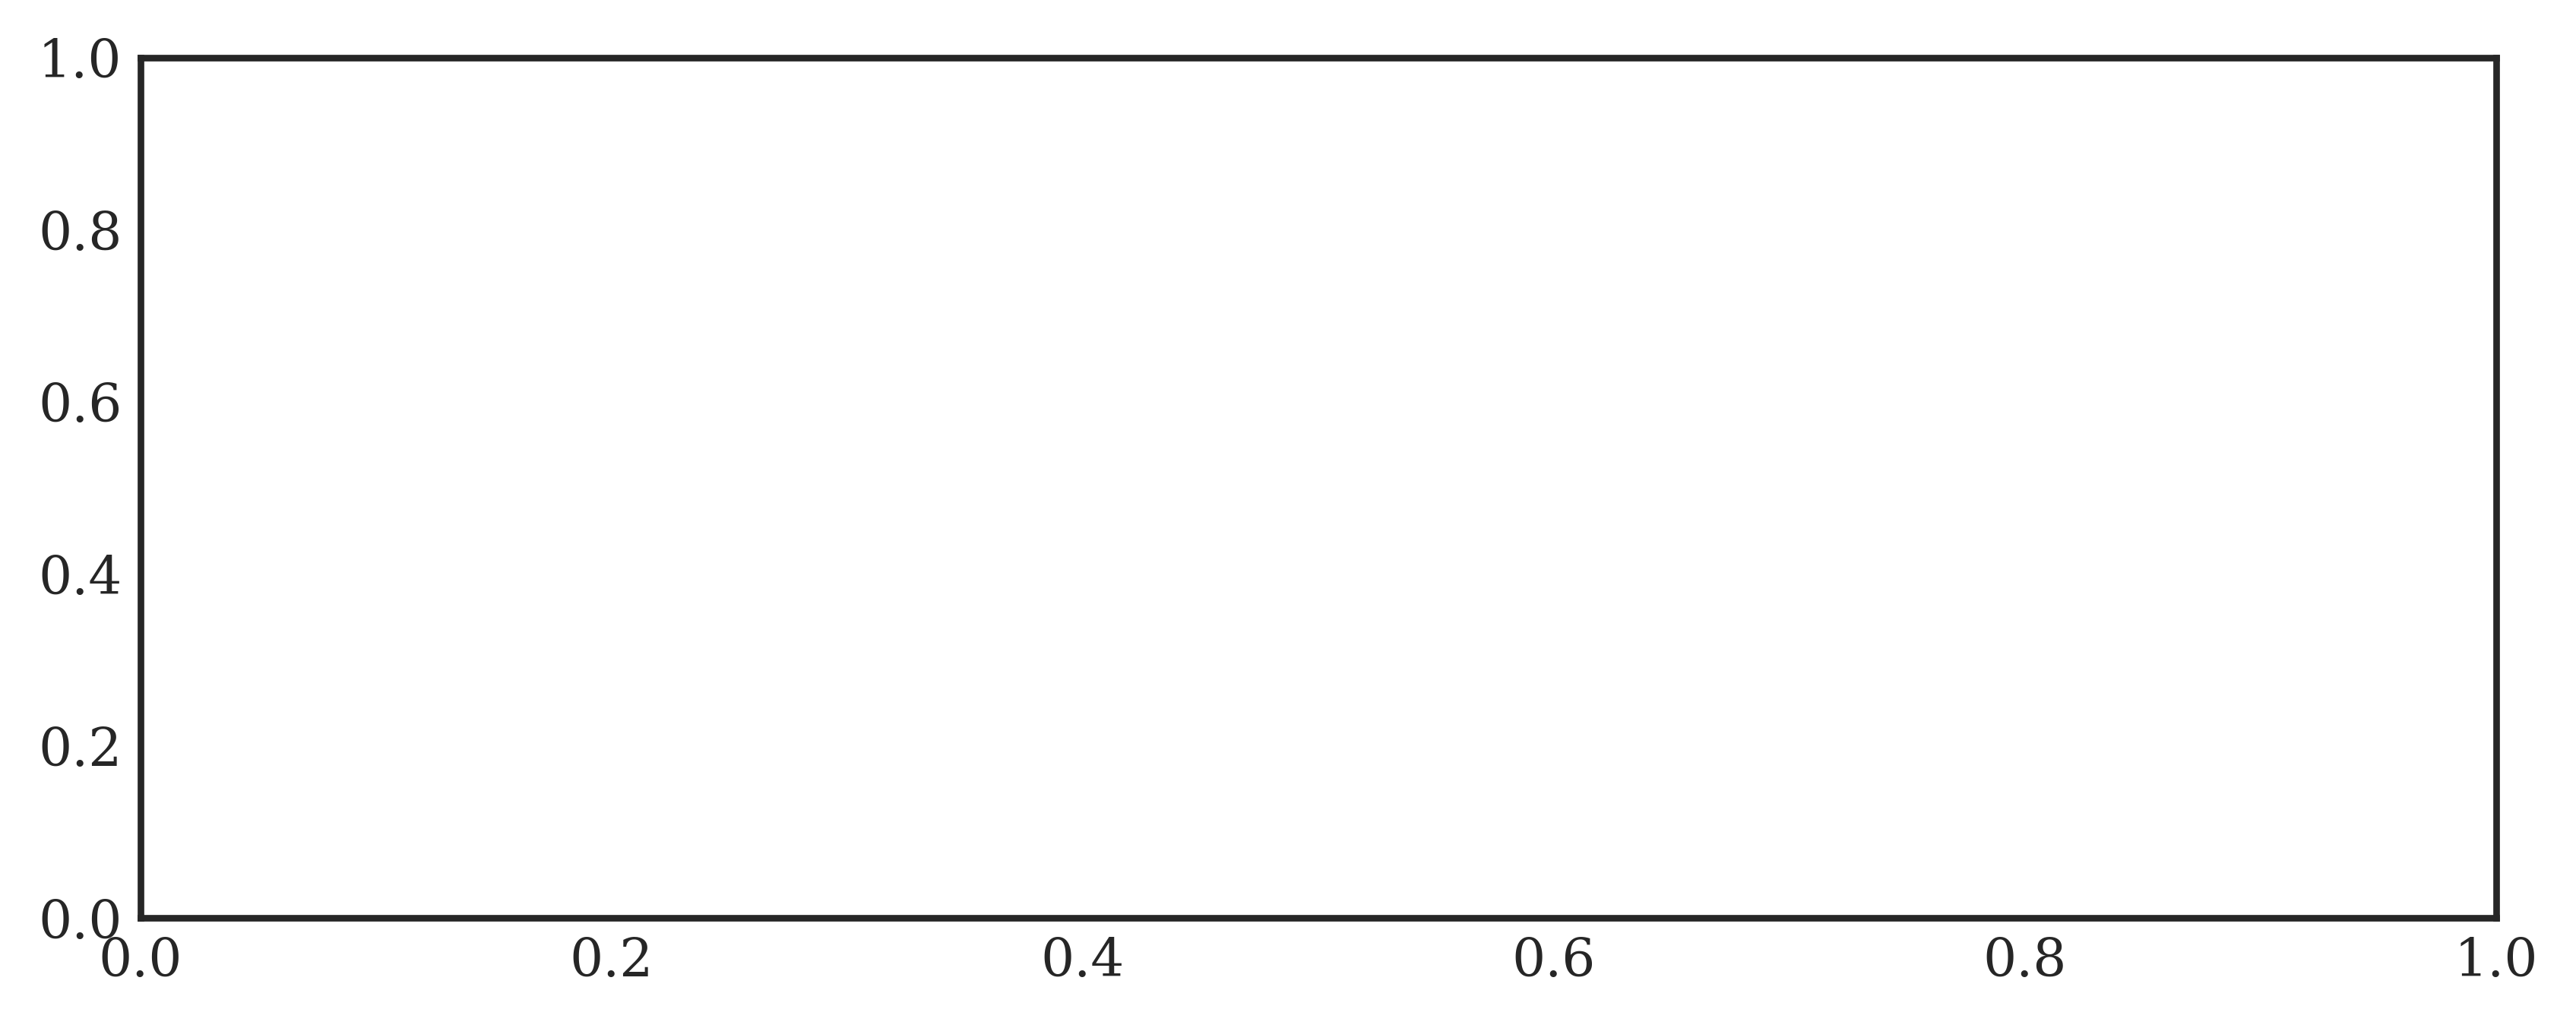

In [10]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=500)
odor_c_decoding_ext(rp[target == 2, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('odor_b_superchris.png', dpi=500)
#plt.savefig('odor_b_superchris.eps', format='eps', dpi=500)
plt.show()

# Cross Correlation
Find the cross correlation between odors across trials

In [ ]:
# Corss correlation test:
# raw data

plt.plot()

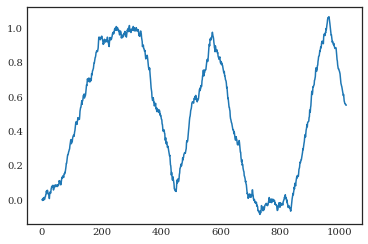

In [45]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
B= np.ones(128)
corr = signal.correlate(sig_noise, B, mode='same') / 128

plt.plot(corr)

(41, 200)


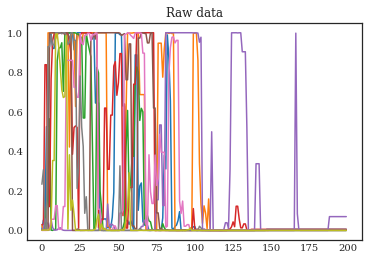

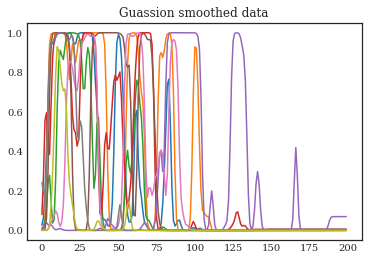

(3, 200)


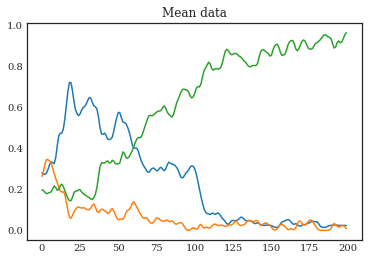

(3, 200)


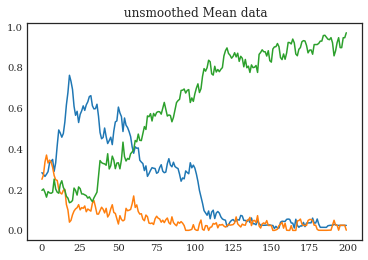

In [53]:
# look at the cross correlation of the avg neural data
# odor B previous 0, current 1, future 2

print(rp[target == 1, :, :][:, :, 0].shape)
plt.plot(rp[target == 1, :, :][:, :, 1][1:10,:].T)
plt.title('Raw data')
plt.show()

# Smooth over the noisy trial decodings...
odor_B_prev_smooth = rp[target == 1, :, :][:, :, 0].copy()
odor_B_current_smooth = rp[target == 1, :, :][:, :, 1].copy()
odor_B_future_smooth = rp[target == 1, :, :][:, :, 2].copy()
for i in range(rp[target == 1, :, :][:, :, 0].shape[0]):
    odor_B_prev_smooth[i, :] = gaussian_filter1d(rp[target == 1, :, :][:, :, 0][i, :], 1)
    odor_B_current_smooth[i, :] = gaussian_filter1d(rp[target == 1, :, :][:, :, 1][i, :], 1)
    odor_B_future_smooth[i, :] = gaussian_filter1d(rp[target == 1, :, :][:, :, 2][i, :], 1)
    
plt.plot(odor_B_current_smooth[1:10,:].T)
plt.title('Guassion smoothed data')
plt.show()

# calculate the mean and CI's of the curves... 
use_median = False
odor_B_prev_central = central_curves(odor_B_prev_smooth, use_median)
odor_B_current_central = central_curves(odor_B_current_smooth, use_median)
odor_B_future_central = central_curves(odor_B_future_smooth, use_median)

print(odor_B_current_central.shape)
plt.plot(odor_B_current_central[0,:].T)
plt.plot(odor_B_prev_central[0,:].T)
plt.plot(odor_B_future_central[0,:].T)
plt.title('Mean data')
plt.show()

# calculate the mean and CI's of the curves... 
use_median = False
odor_B_prev_central = central_curves(rp[target == 1, :, :][:, :, 0], use_median)
odor_B_current_central = central_curves(rp[target == 1, :, :][:, :, 1], use_median)
odor_B_future_central = central_curves(rp[target == 1, :, :][:, :, 2], use_median)

print(odor_B_current_central.shape)
plt.plot(odor_B_current_central[0,:].T)
plt.plot(odor_B_prev_central[0,:].T)
plt.plot(odor_B_future_central[0,:].T)
plt.title(' unsmoothed Mean data')
plt.show()

Text(0.5, 1.0, 'xcorr Odor B, A & B')

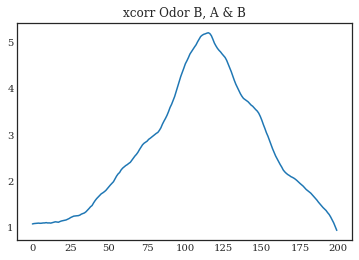

In [54]:
# mode = full, valid, same
corr = signal.correlate(odor_B_current_central[0,:].T, odor_B_prev_central[0,:].T, mode='same') 
plt.plot(corr)
plt.title("xcorr Odor B, A & B")

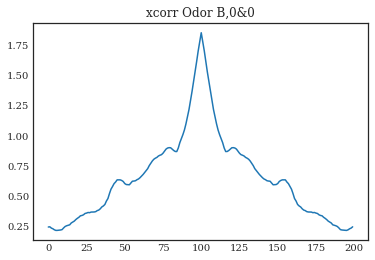

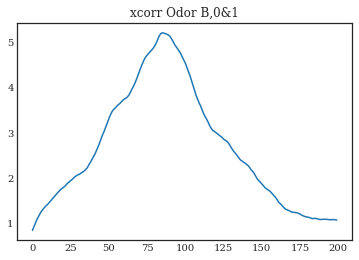

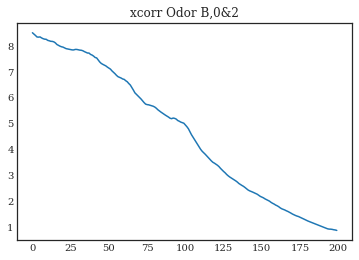

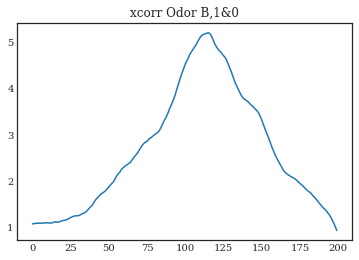

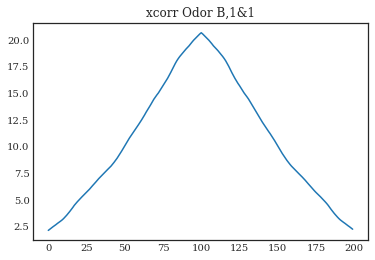

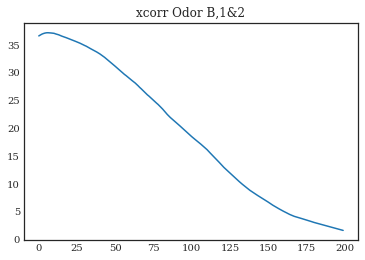

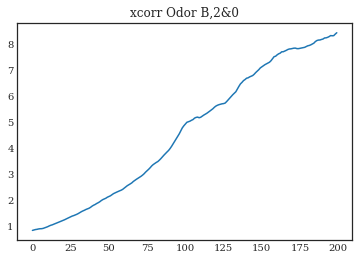

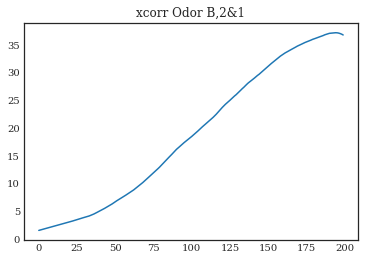

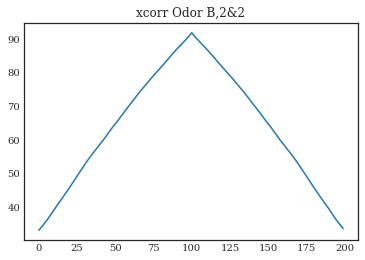

In [83]:
# xcorr for all odors
od = [odor_B_prev_central[0,:].T, odor_B_current_central[0,:].T, odor_B_future_central[0,:].T]

for ii in range(len(od)):
    for jj in range(len(od)):
        corr = signal.correlate(od[ii], od[jj], mode='same') 
        plt.plot(corr)
        title = "xcorr Odor B," + str(ii) + "&" + str(jj)
        plt.title(title)
        plt.show()


0, 0: max correlation is at lag 0
0, 1: max correlation is at lag -16
0, 2: max correlation is at lag -151
1, 0: max correlation is at lag 16
1, 1: max correlation is at lag 0
1, 2: max correlation is at lag 121
2, 0: max correlation is at lag 151
2, 1: max correlation is at lag -121
2, 2: max correlation is at lag 0


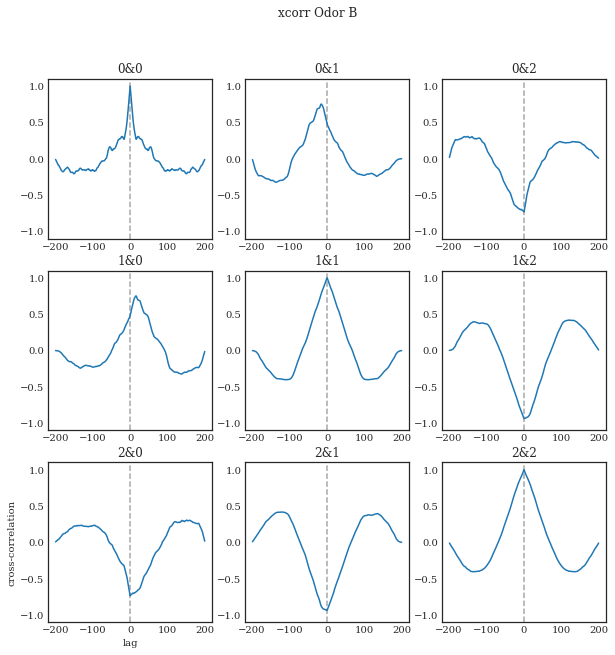

In [82]:

# xcorr for all odors
fig, axes = plt.subplots(3,3, figsize=(10,10))
od = [odor_B_prev_central[0,:].T, odor_B_current_central[0,:].T, odor_B_future_central[0,:].T]

for ii in range(len(od)):
    for jj in range(len(od)):
        
        npts = len(od[0])
        x = np.linspace(0, max(od[0]), npts)
        y1, y2 = od[ii], od[jj]
        
        # compute the lags and take the xcorr of the normalized data
        lags = np.arange(-npts + 1, npts)
        ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
        ccor = ccov / (npts * y1.std() * y2.std())
        
        axes[ii,jj].axvline(x=0.0, ls='--',c='k', alpha=.35)
        axes[ii,jj].plot(lags, ccor)
        axes[ii,jj].set_ylim(-1.1, 1.1)
        #axes[ii,jj].set_ylabel('cross-correlation')
        #axes[ii,jj].set_xlabel('lag of y1 relative to y2')
        title = str(ii) + "&" + str(jj)
        axes[ii,jj].set_title(title)
        

        maxlag = lags[np.argmax(ccor)]
        print("%s, %s: max correlation is at lag %d" %(ii, jj, maxlag))

        # mode = full, valid, same
        #corr = signal.correlate(od[ii], od[jj], mode='full') 
        
        # Normalize by the zero-lag value:
        #autocorr_xdm /= autocorr_xdm[nx - 1]

        #axes[ii,jj].plot(corr)
        #title = str(ii) + "&" + str(jj)
        #axes[ii,jj].set_title(title)

        if ii ==2 and jj == 0:
            axes[ii,jj].set_xlabel('lag')
            axes[ii,jj].set_ylabel('cross-correlation')
            
fig.suptitle("xcorr Odor B")     
plt.show()



max correlation is at lag -16


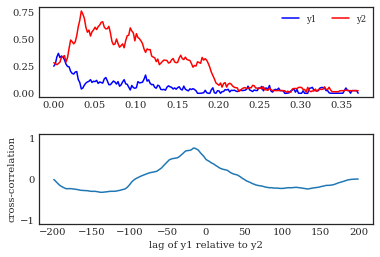

In [87]:
od = [odor_B_prev_central[0,:].T, odor_B_current_central[0,:].T, odor_B_future_central[0,:].T]
npts = len(od[0])
x = np.linspace(0, max(od[0]), npts)
y1 = od[0] #5 * np.sin(x/2) + np.random.randn(npts)
y2 = od[1] #5 * np.cos(x/2) + np.random.randn(npts)

lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
#ax.set_ylim(-10, 10)
ax.legend(fontsize='small', ncol=2) #loc='upper right', 

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

#terada 2017

## Origional analysis's

In [6]:

# TODO: Make this a loop

rolling_preds_barat, phase_preds_barat, target_barat = analysis_flow(dataPaths,'Barat', theta_thres, corr_thres)
rolling_preds_buchanan, phase_preds_buchanan, target_buchanan = analysis_flow(dataPaths,'Buchanan', theta_thres, corr_thres)
rolling_preds_stella, phase_preds_stella, target_stella = analysis_flow(dataPaths,'Stella', theta_thres, corr_thres)
rolling_preds_superchris, phase_preds_superchris, target_superchris = analysis_flow(dataPaths,'Superchris', theta_thres, corr_thres)
rolling_preds_mitt, phase_preds_mitt, target_mitt = analysis_flow(dataPaths,'Mitt', theta_thres, corr_thres)

C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\FortinLab\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means

In [7]:
# (30, 74, 4) nn = 37*2
rolling_preds_superchris[:, :, :].shape

(134, 37, 4)

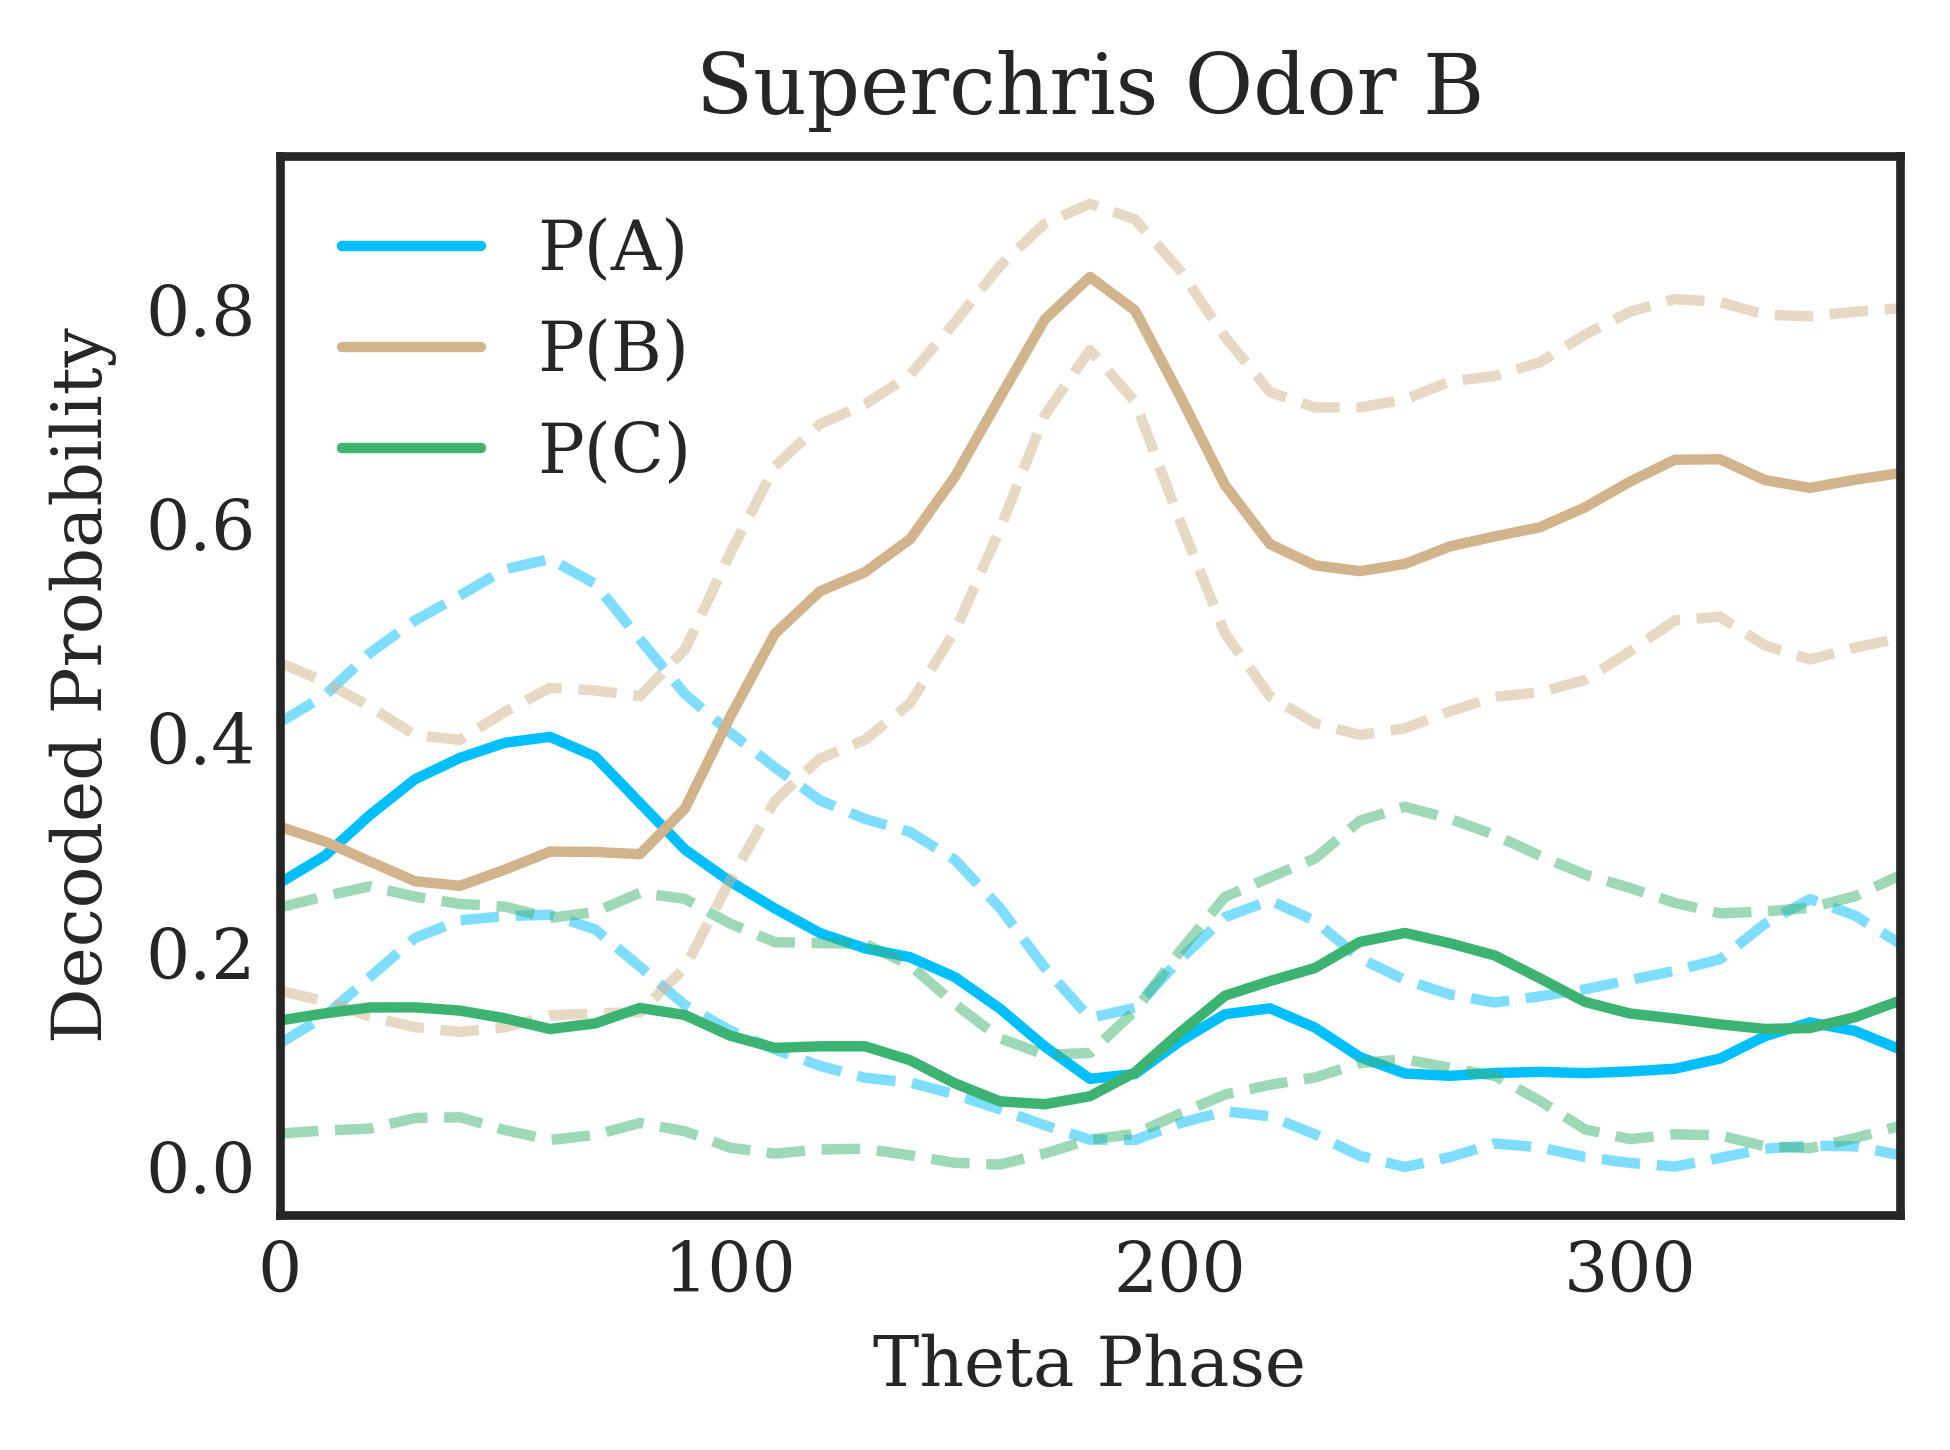

In [8]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_B_decoding(rolling_preds_superchris[target_superchris == 1, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('odor_b_superchris.png', dpi=500)
#plt.savefig('odor_b_superchris.eps', format='eps', dpi=500)
plt.show()

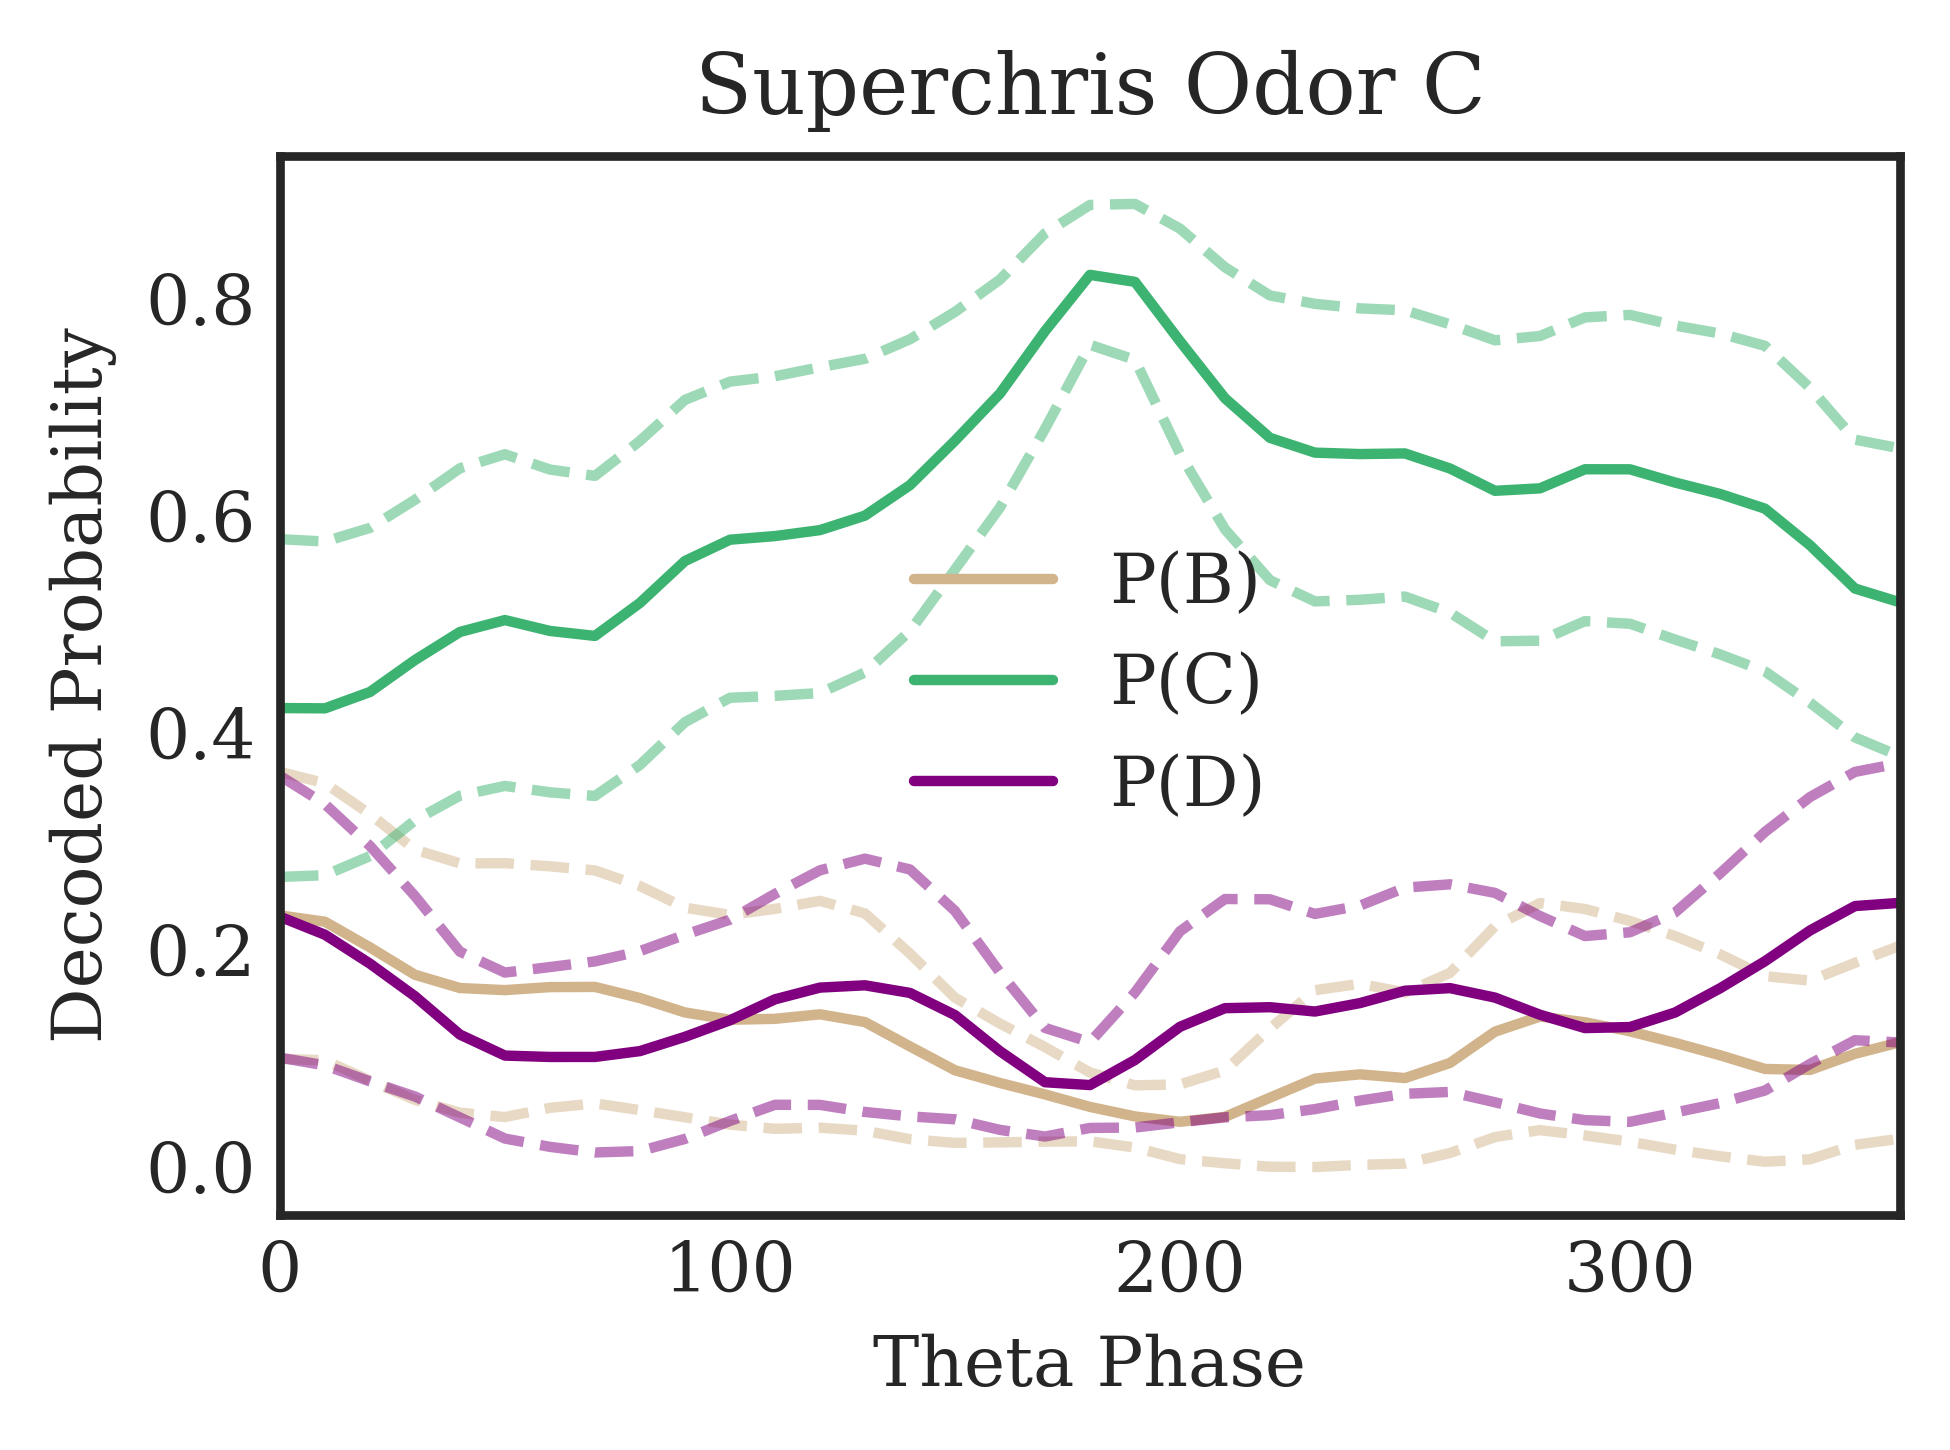

In [8]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_C_decoding(rolling_preds_superchris[target_superchris == 2, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('odor_c_superchris.png', dpi=500)
#plt.savefig('odor_c_superchris.eps', format='eps', dpi=500)
plt.show()

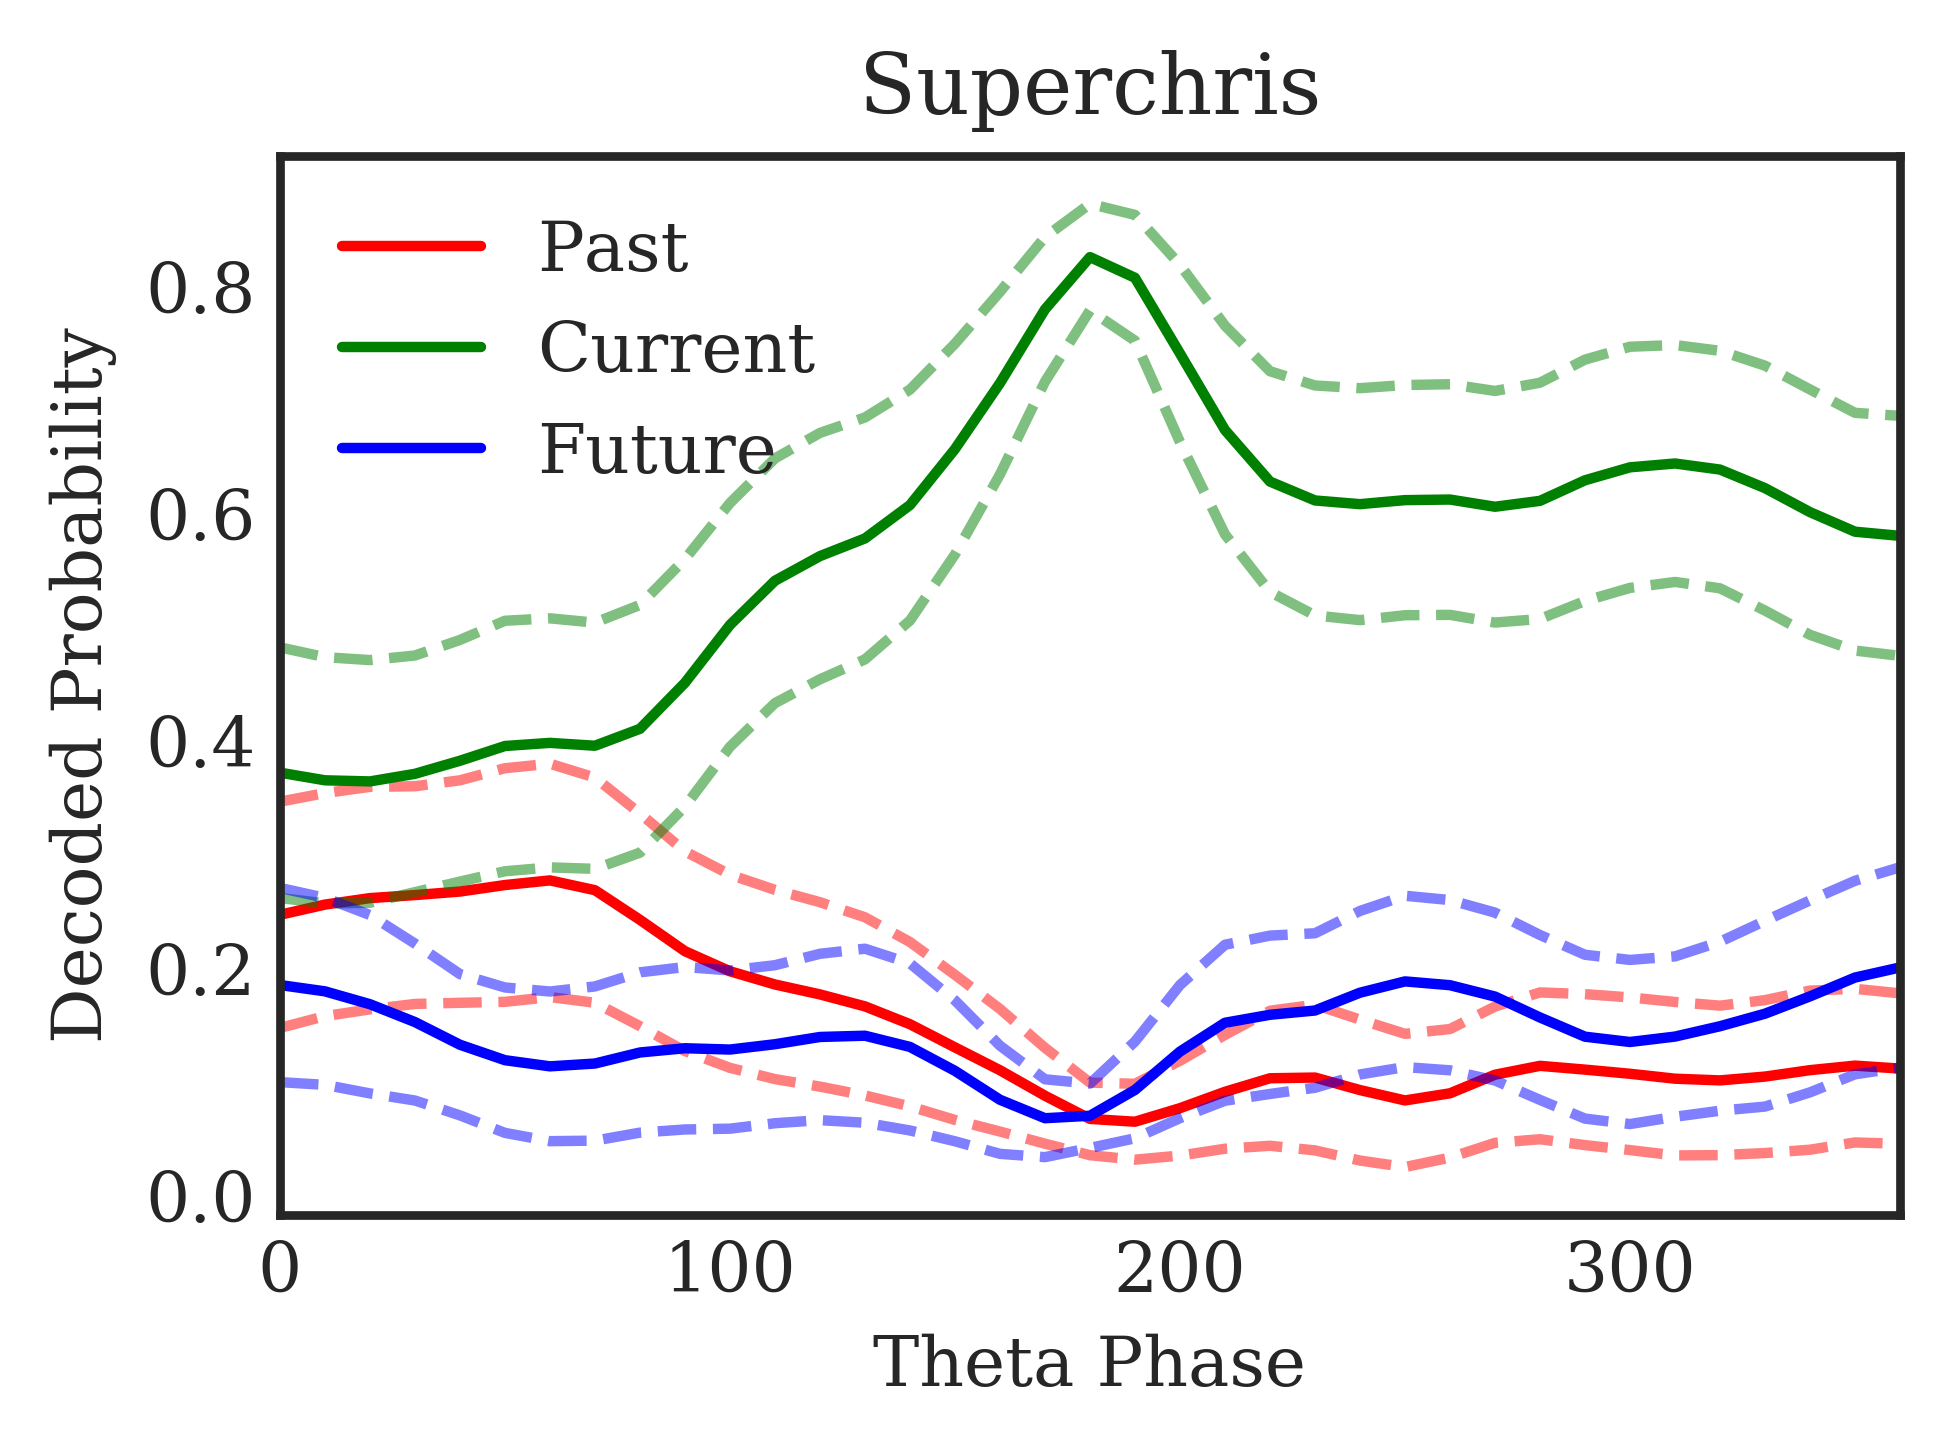

In [10]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
rolling_decoding(rolling_preds_superchris[target_superchris == 1, :, :], rolling_preds_superchris[target_superchris == 2, :, :], 'Superchris')
fig.tight_layout()
#plt.savefig('theta_superchris.png', dpi=500)
#plt.savefig('theta_superchris.eps', format='eps', dpi=500)
plt.show()


In [8]:
decoding_preds1_barat, decoding_preds2_barat, decoding_preds3_barat = phase_preds_barat
decoding_preds1_buchanan, decoding_preds2_buchanan, decoding_preds3_buchanan = phase_preds_buchanan
decoding_preds1_stella, decoding_preds2_stella, decoding_preds3_stella = phase_preds_stella
decoding_preds1_superchris, decoding_preds2_superchris, decoding_preds3_superchris = phase_preds_superchris
decoding_preds1_mitt, decoding_preds2_mitt, decoding_preds3_mitt = phase_preds_mitt

In [9]:
from scipy.stats import t

In [10]:
def paired_t_test(first_sample, second_sample):
    diff_sample = first_sample - second_sample
    n = diff_sample.shape[0]
    x_bar = np.mean(diff_sample)
    #print(x_bar)
    s = np.std(diff_sample)
    t_stat = x_bar / (s / np.sqrt(n))
    p = 1 - t.cdf(t_stat, n - 1)
    return p

In [11]:
plt.rc('text', usetex=True)

In [12]:
import matplotlib.patches as mpatches

In [13]:
def hypothesis_test(decoding_preds1_B, decoding_preds2_B, decoding_preds3_B, 
                    decoding_preds1_C, decoding_preds2_C, decoding_preds3_C, name):
    p1 = paired_t_test(np.concatenate([decoding_preds1_B[:, 0], decoding_preds1_C[:, 1]]), np.concatenate([decoding_preds1_B[:, 2], decoding_preds1_C[:, 3]]))
    #print(np.round(p1, 4))
    p3 = paired_t_test(np.concatenate([decoding_preds3_B[:, 2], decoding_preds3_C[:, 3]]), np.concatenate([decoding_preds3_B[:, 0], decoding_preds3_C[:, 1]]))
    #print(np.round(p3, 4))
    violin_parts1 = ax.violinplot([np.concatenate([decoding_preds1_B[:, 0], decoding_preds1_C[:, 1]]), 
                                   np.concatenate([decoding_preds2_B[:, 0], decoding_preds2_C[:, 1]]), 
                                   np.concatenate([decoding_preds3_B[:, 0], decoding_preds3_C[:, 1]])],
                                   [1, 6, 11], 
                                 widths=1, showmeans=True, showextrema=False)
    plt.setp(violin_parts1['bodies'], facecolor='red', edgecolor='none')
    violin_parts1['cmeans'].set_color('black')

    violin_parts2 = ax.violinplot([np.concatenate([decoding_preds1_B[:, 1], decoding_preds1_C[:, 2]]), 
                                   np.concatenate([decoding_preds2_B[:, 1], decoding_preds2_C[:, 2]]), 
                                   np.concatenate([decoding_preds3_B[:, 1], decoding_preds3_C[:, 2]])],
                                   [2, 7, 12], 
                                 widths=1, showmeans=True, showextrema=False)
    plt.setp(violin_parts2['bodies'], facecolor='mediumseagreen', edgecolor='none')
    violin_parts2['cmeans'].set_color('black')

    violin_parts2 = ax.violinplot([np.concatenate([decoding_preds1_B[:, 2], decoding_preds1_C[:, 3]]), 
                                   np.concatenate([decoding_preds2_B[:, 2], decoding_preds2_C[:, 3]]), 
                                   np.concatenate([decoding_preds3_B[:, 2], decoding_preds3_C[:, 3]])],
                                   [3, 8, 13], 
                                 widths=1, showmeans=True, showextrema=False)
    plt.setp(violin_parts2['bodies'], facecolor='blue', edgecolor='none')
    violin_parts2['cmeans'].set_color('black')

    plt.xticks([2, 7, 12], ['Descend', 'Trough', 'Ascend'])
    plt.xlabel('Theta phase')
    plt.ylabel('Decoded Probability')
    plt.title('{} Results'.format(name))
    red_patch = mpatches.Patch(color='red', label='Previous', alpha=0.5)
    green_patch = mpatches.Patch(color='green', label='Current', alpha=0.5)
    blue_patch = mpatches.Patch(color='blue', label='Future', alpha=0.5)
    plt.legend(handles=[red_patch, green_patch, blue_patch])
    plt.text(1, 0.6, r'$p = {}$'.format(np.round(p1, 4)))
    #plt.text(6, 0.6, r'$p = {}$'.format(np.round(p2, 4)))
    plt.text(11, 0.6, r'$p = {}$'.format(np.round(p3, 4)))

In [14]:
decoding_preds1_B = np.concatenate([decoding_preds1_barat[target_barat == 1], 
                                    decoding_preds1_buchanan[target_buchanan == 1], 
                                    decoding_preds1_stella[target_stella == 1], 
                                    decoding_preds1_superchris[target_superchris == 1],
                                    decoding_preds1_mitt[target_mitt == 1]])
decoding_preds2_B = np.concatenate([decoding_preds2_barat[target_barat == 1], 
                                    decoding_preds2_buchanan[target_buchanan == 1], 
                                    decoding_preds2_stella[target_stella == 1], 
                                    decoding_preds2_superchris[target_superchris == 1],
                                    decoding_preds2_mitt[target_mitt == 1]])
decoding_preds3_B = np.concatenate([decoding_preds3_barat[target_barat == 1], 
                                    decoding_preds3_buchanan[target_buchanan == 1], 
                                    decoding_preds3_stella[target_stella == 1], 
                                    decoding_preds3_superchris[target_superchris == 1],
                                    decoding_preds3_mitt[target_mitt == 1]])

In [15]:
decoding_preds1_C = np.concatenate([decoding_preds1_barat[target_barat == 2], 
                                    decoding_preds1_buchanan[target_buchanan == 2], 
                                    decoding_preds1_stella[target_stella == 2], 
                                    decoding_preds1_superchris[target_superchris == 2],
                                    decoding_preds1_mitt[target_mitt == 2]])
decoding_preds2_C = np.concatenate([decoding_preds2_barat[target_barat == 2], 
                                    decoding_preds2_buchanan[target_buchanan == 2], 
                                    decoding_preds2_stella[target_stella == 2], 
                                    decoding_preds2_superchris[target_superchris == 2],
                                    decoding_preds2_mitt[target_mitt == 2]])
decoding_preds3_C = np.concatenate([decoding_preds3_barat[target_barat == 2], 
                                    decoding_preds3_buchanan[target_buchanan == 2], 
                                    decoding_preds3_stella[target_stella == 2], 
                                    decoding_preds3_superchris[target_superchris == 2],
                                    decoding_preds3_mitt[target_mitt == 2]])

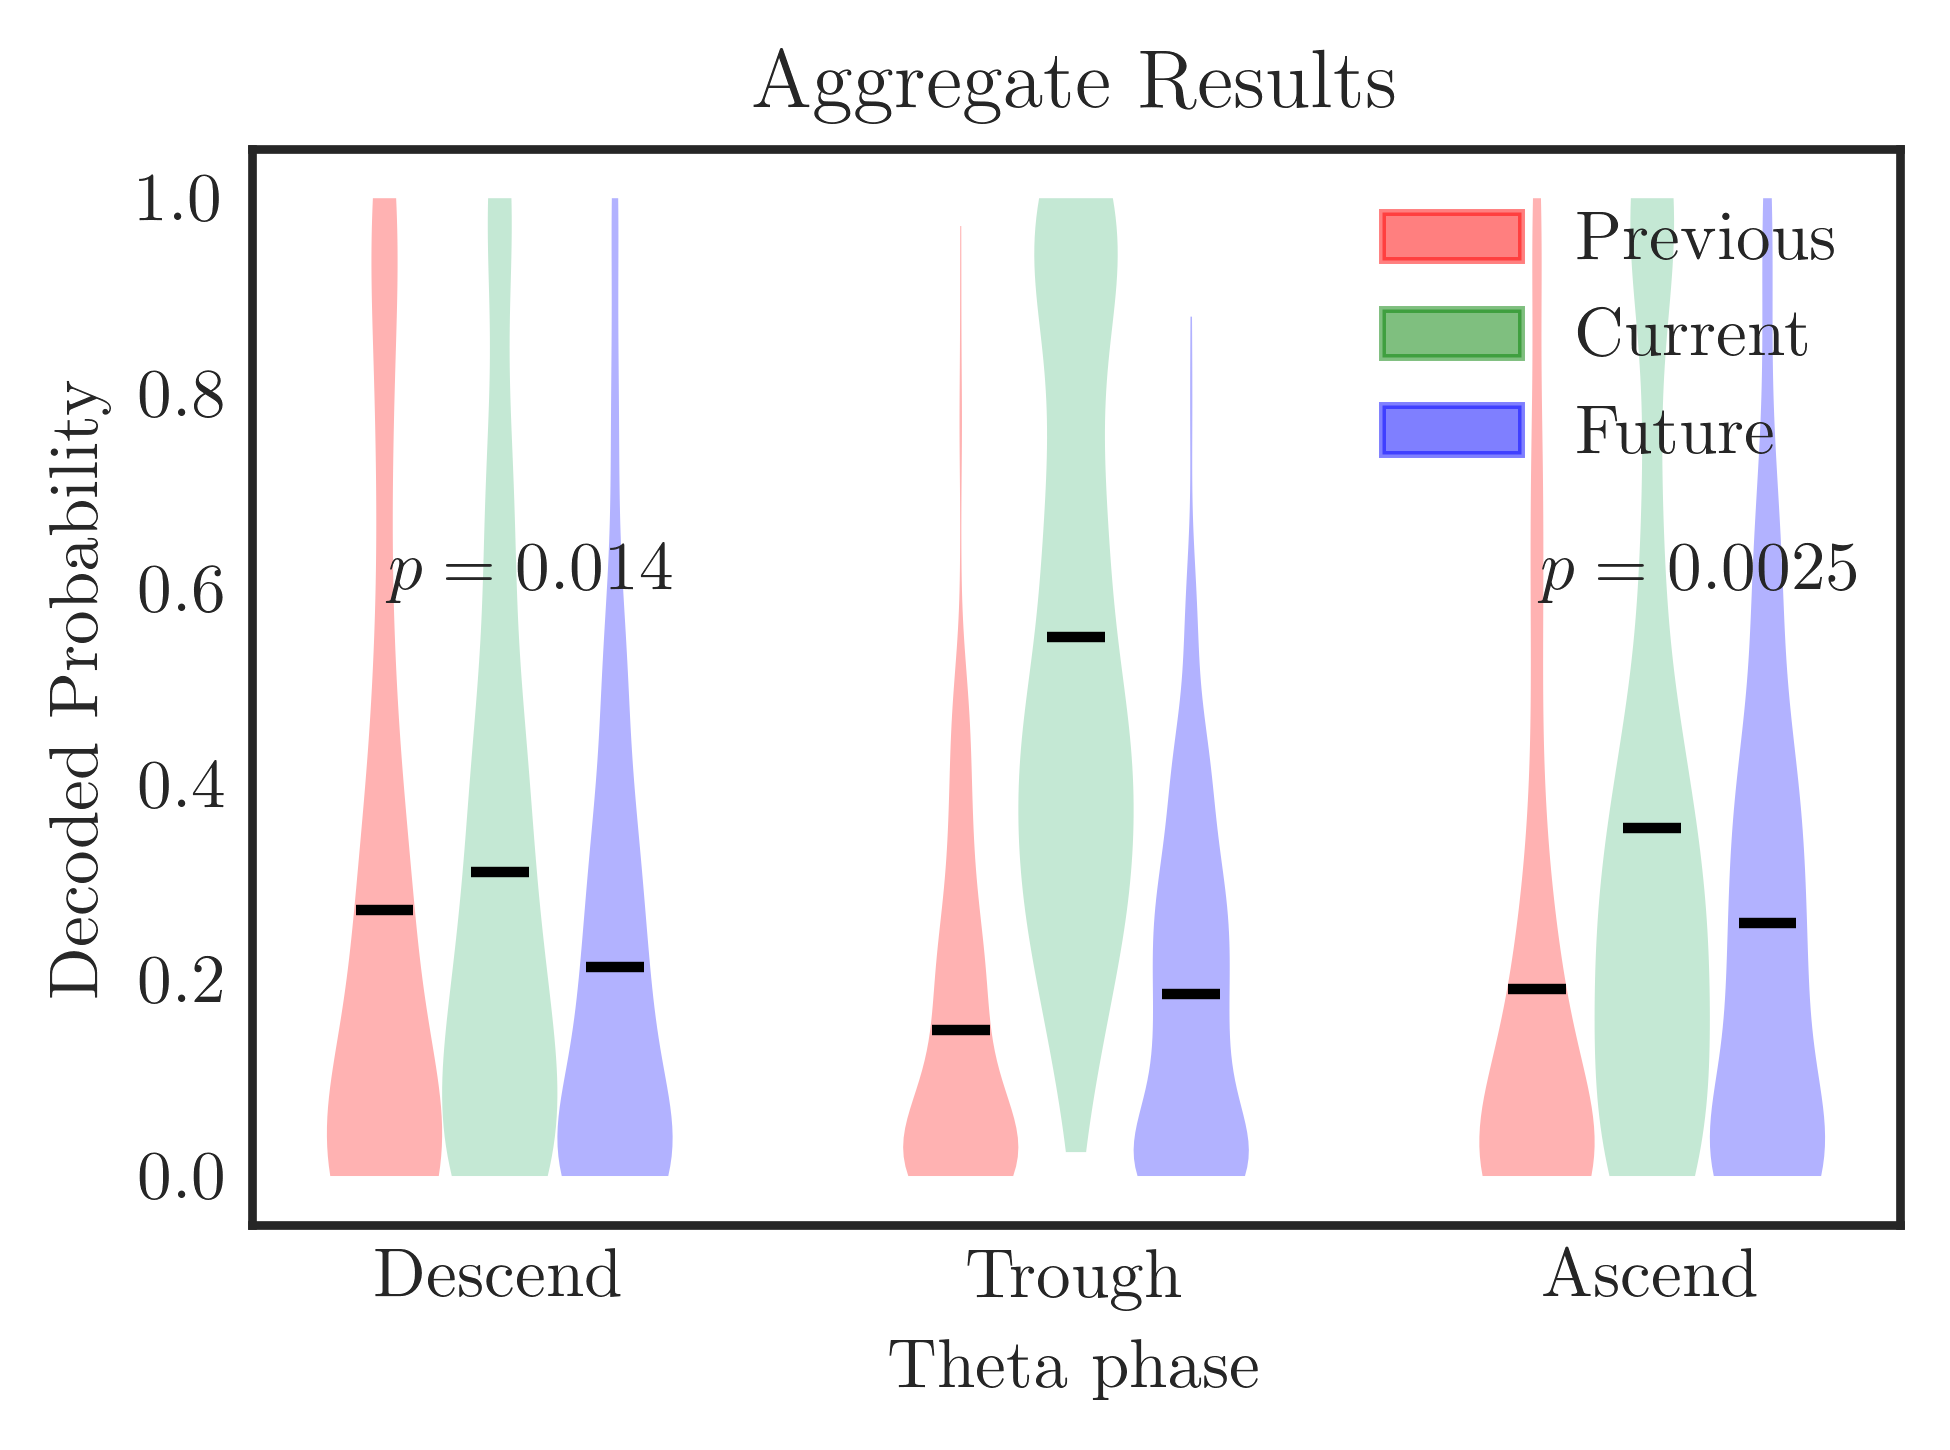

In [16]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
hypothesis_test(decoding_preds1_B, decoding_preds2_B, decoding_preds3_B, 
                    decoding_preds1_C, decoding_preds2_C, decoding_preds3_C, 'Aggregate')
fig.tight_layout()
#plt.savefig('hypothesis_test.png', dpi=500)
#plt.savefig('hypothesis_test.eps', format='eps', dpi=500)
plt.show()

In [11]:
odor_B_preds = np.concatenate([rolling_preds_barat[target_barat == 1, :, :], 
                               rolling_preds_buchanan[target_buchanan == 1, :, :],
                               rolling_preds_stella[target_stella == 1, :, :],
                               rolling_preds_superchris[target_superchris == 1, :, :], 
                               rolling_preds_mitt[target_mitt == 1, :, :]])

In [12]:
odor_C_preds = np.concatenate([rolling_preds_barat[target_barat == 2, :, :], 
                               rolling_preds_buchanan[target_buchanan == 2, :, :],
                               rolling_preds_stella[target_stella == 2, :, :],
                               rolling_preds_superchris[target_superchris == 2, :, :], 
                               rolling_preds_mitt[target_mitt == 2, :, :]])

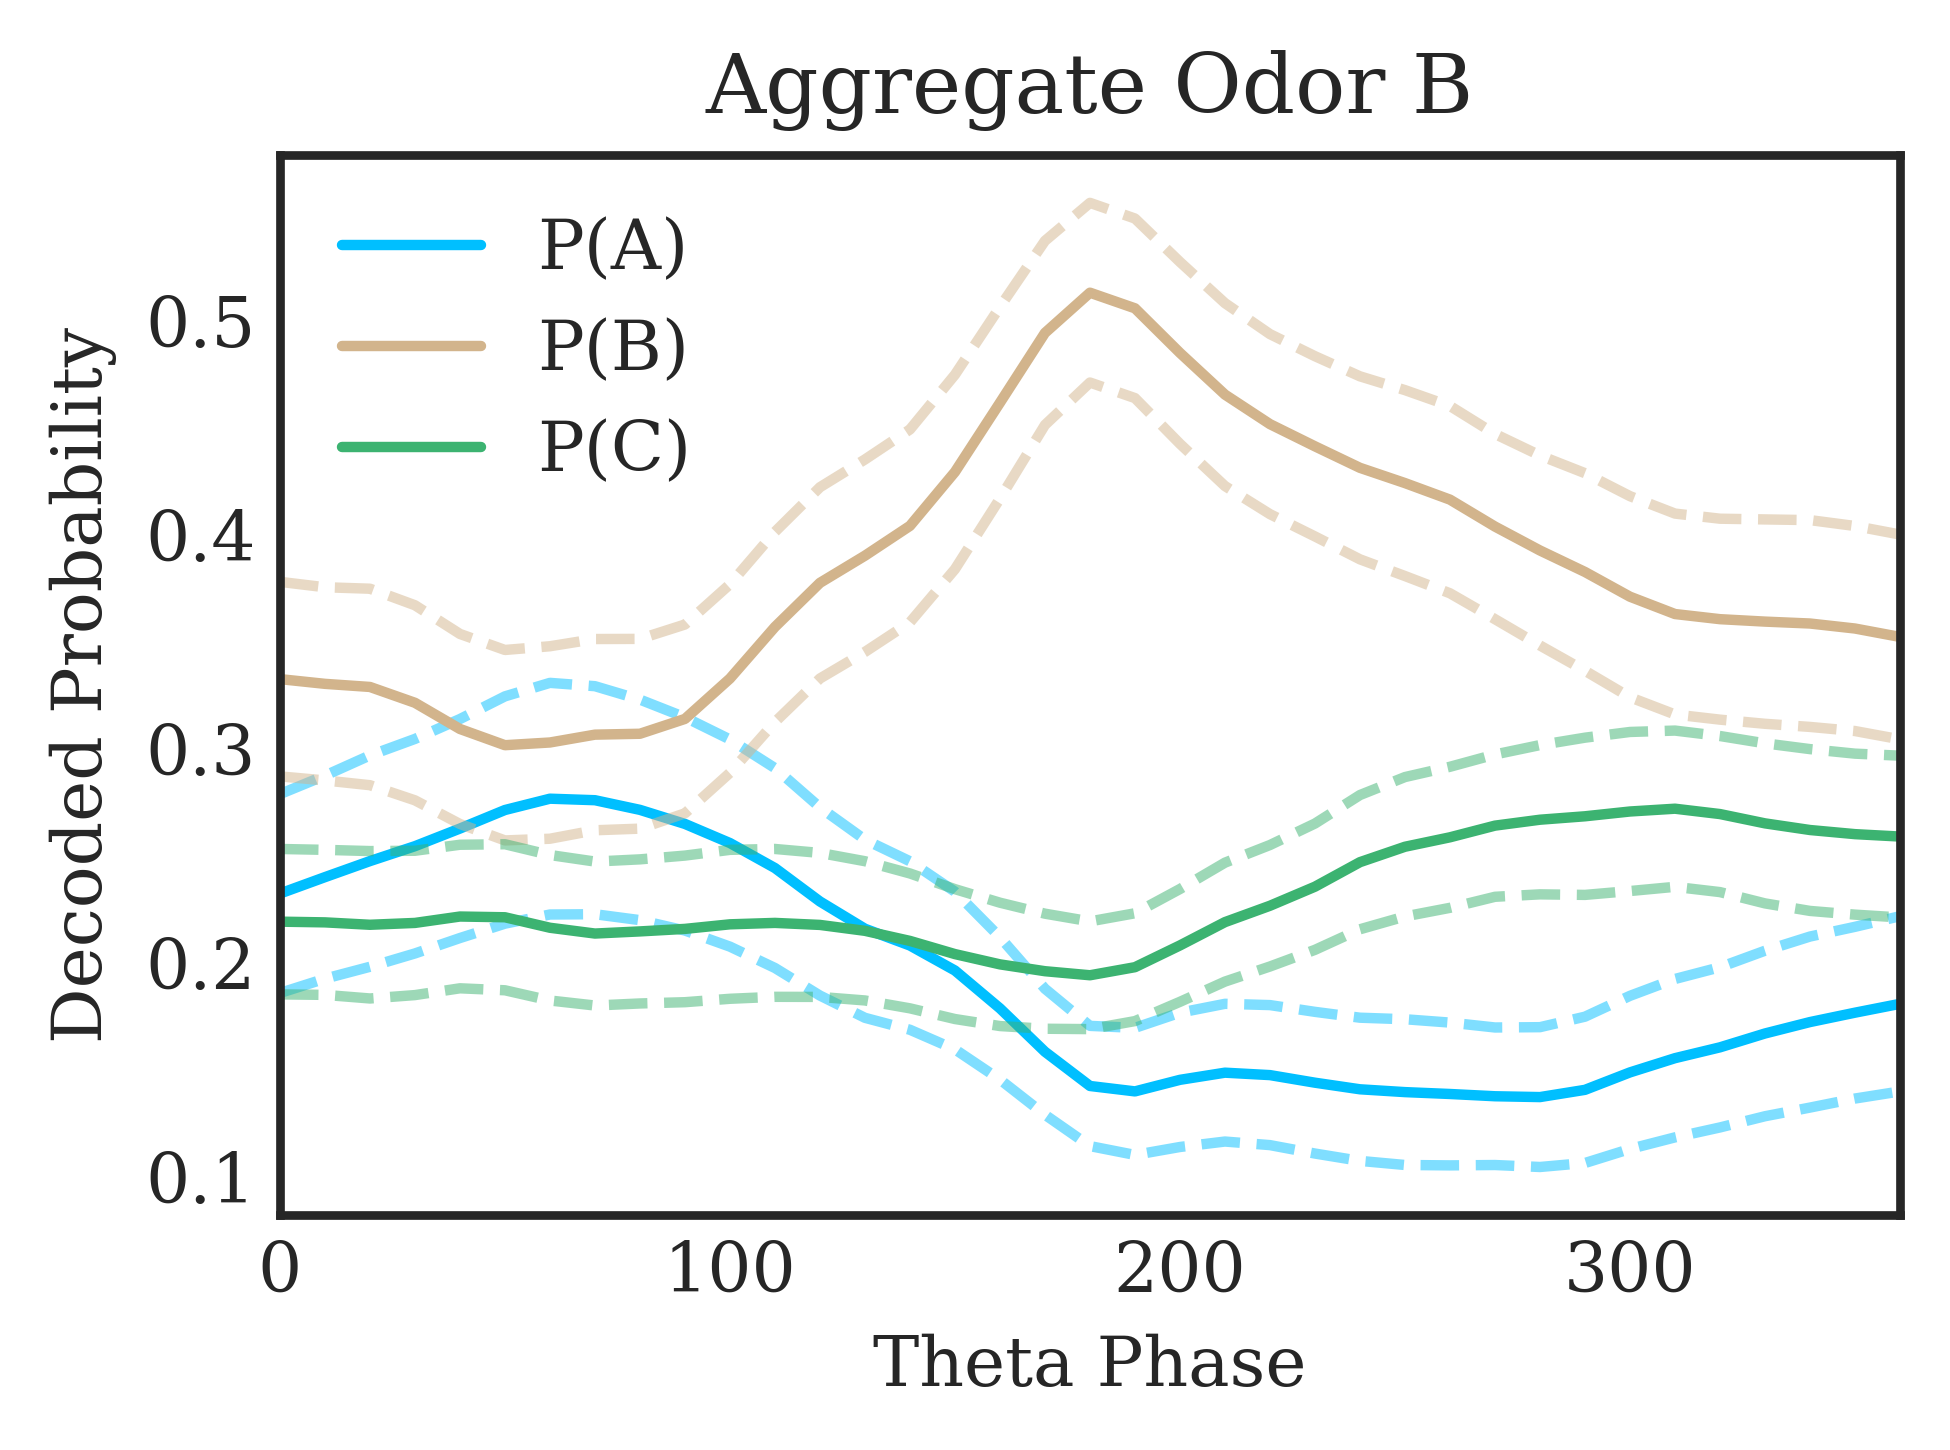

In [13]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_B_decoding(odor_B_preds, 'Aggregate')
fig.tight_layout()
plt.savefig('odor_b_aggregate.png', dpi=500)
plt.savefig('odor_b_aggregate.eps', format='eps', dpi=500)
plt.show()

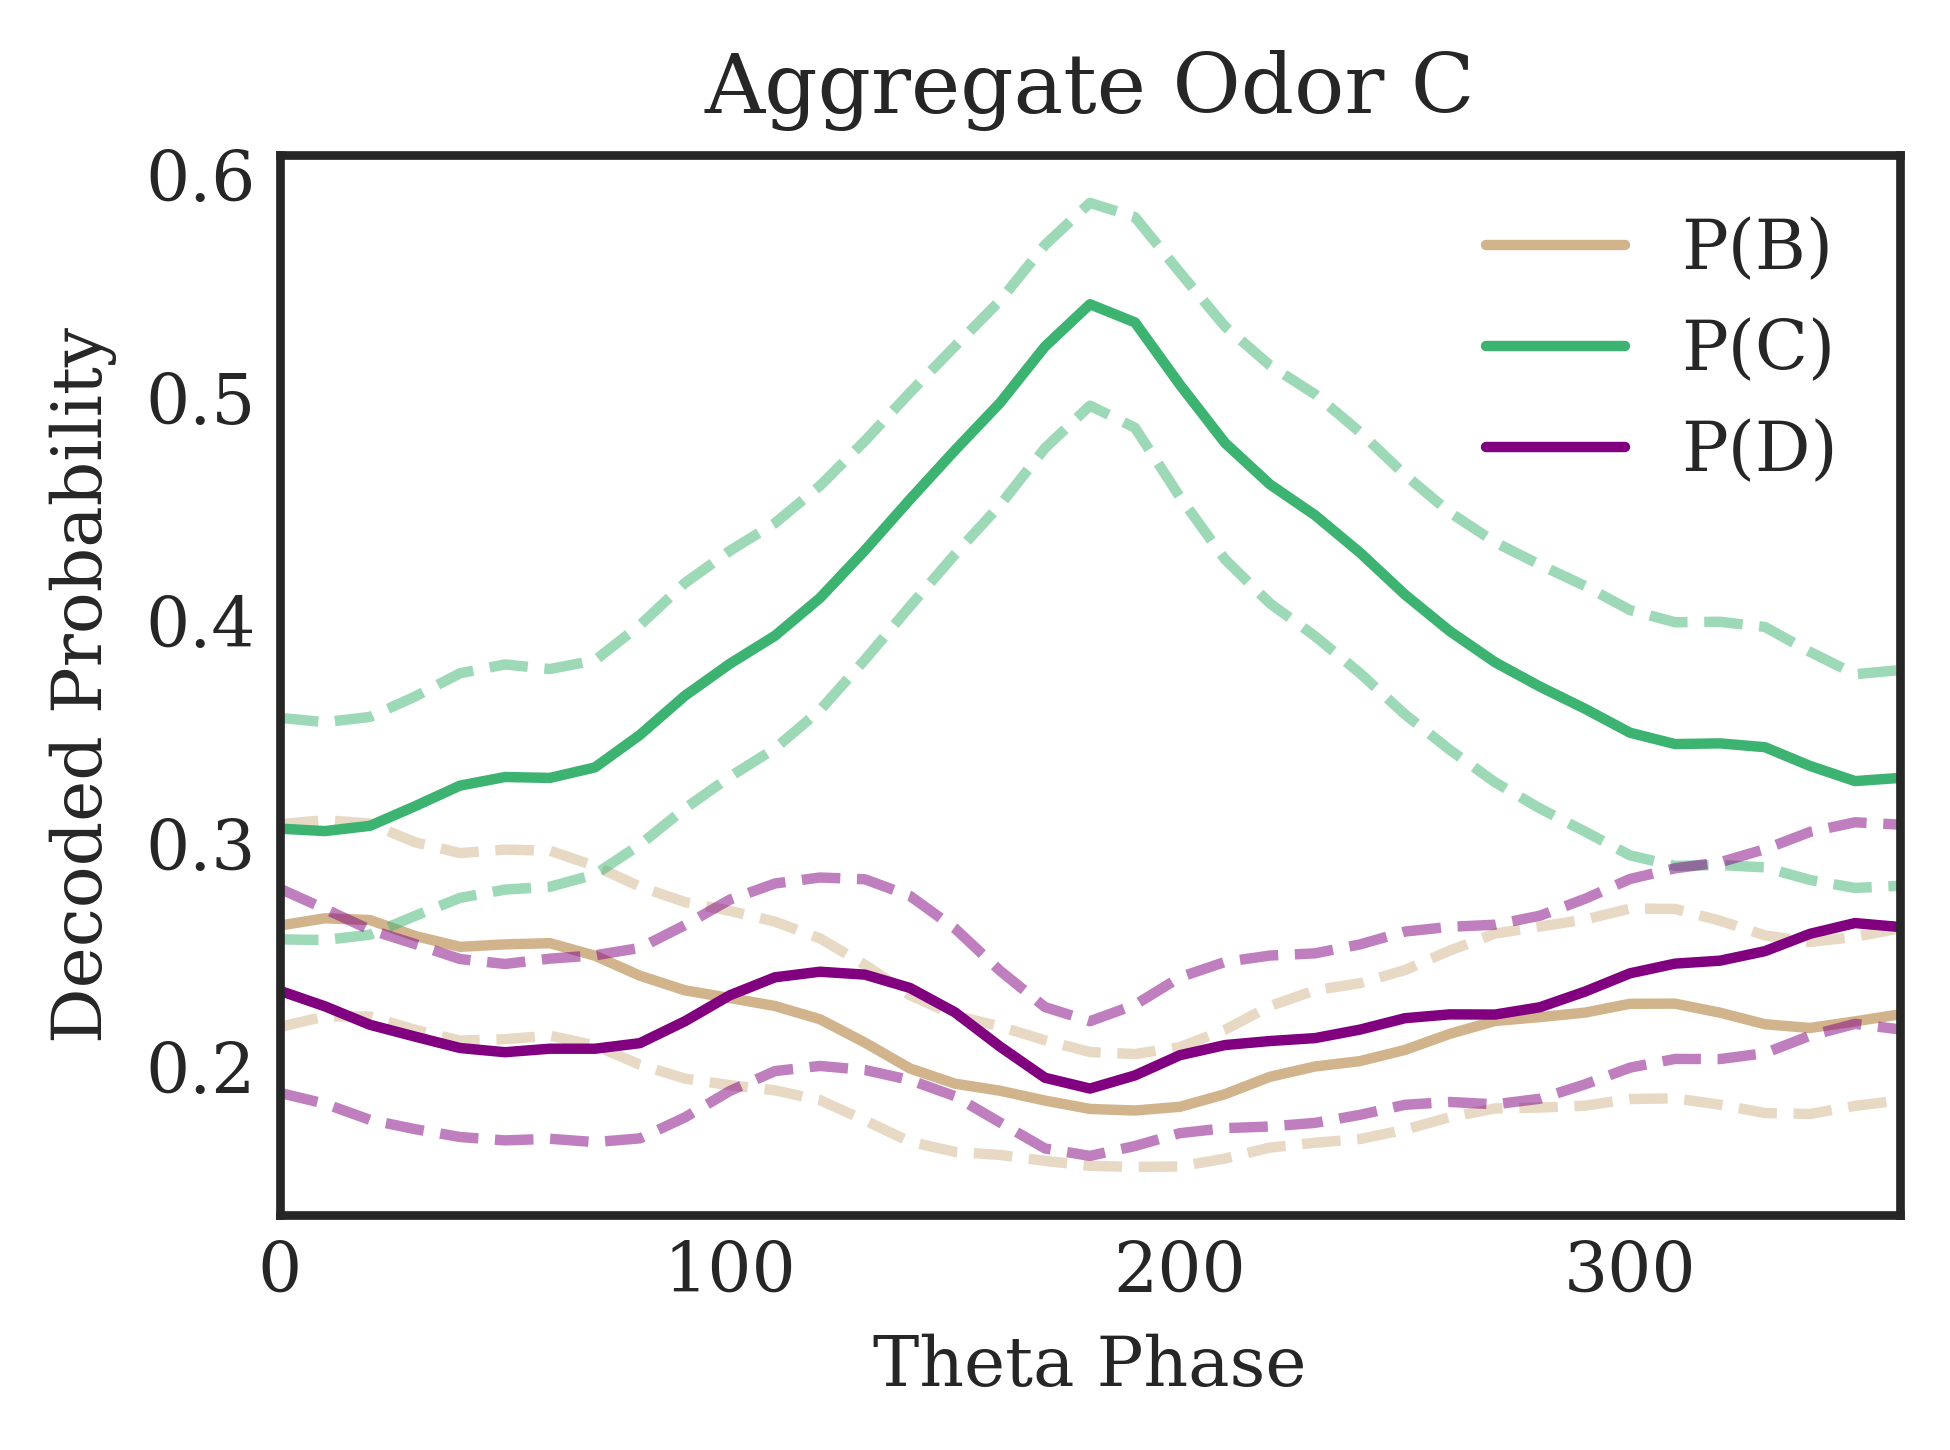

In [14]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
odor_C_decoding(odor_C_preds, 'Aggregate')
fig.tight_layout()
plt.savefig('odor_c_aggregate.png', dpi=500)
plt.savefig('odor_c_aggregate.eps', format='eps', dpi=500)
plt.show()

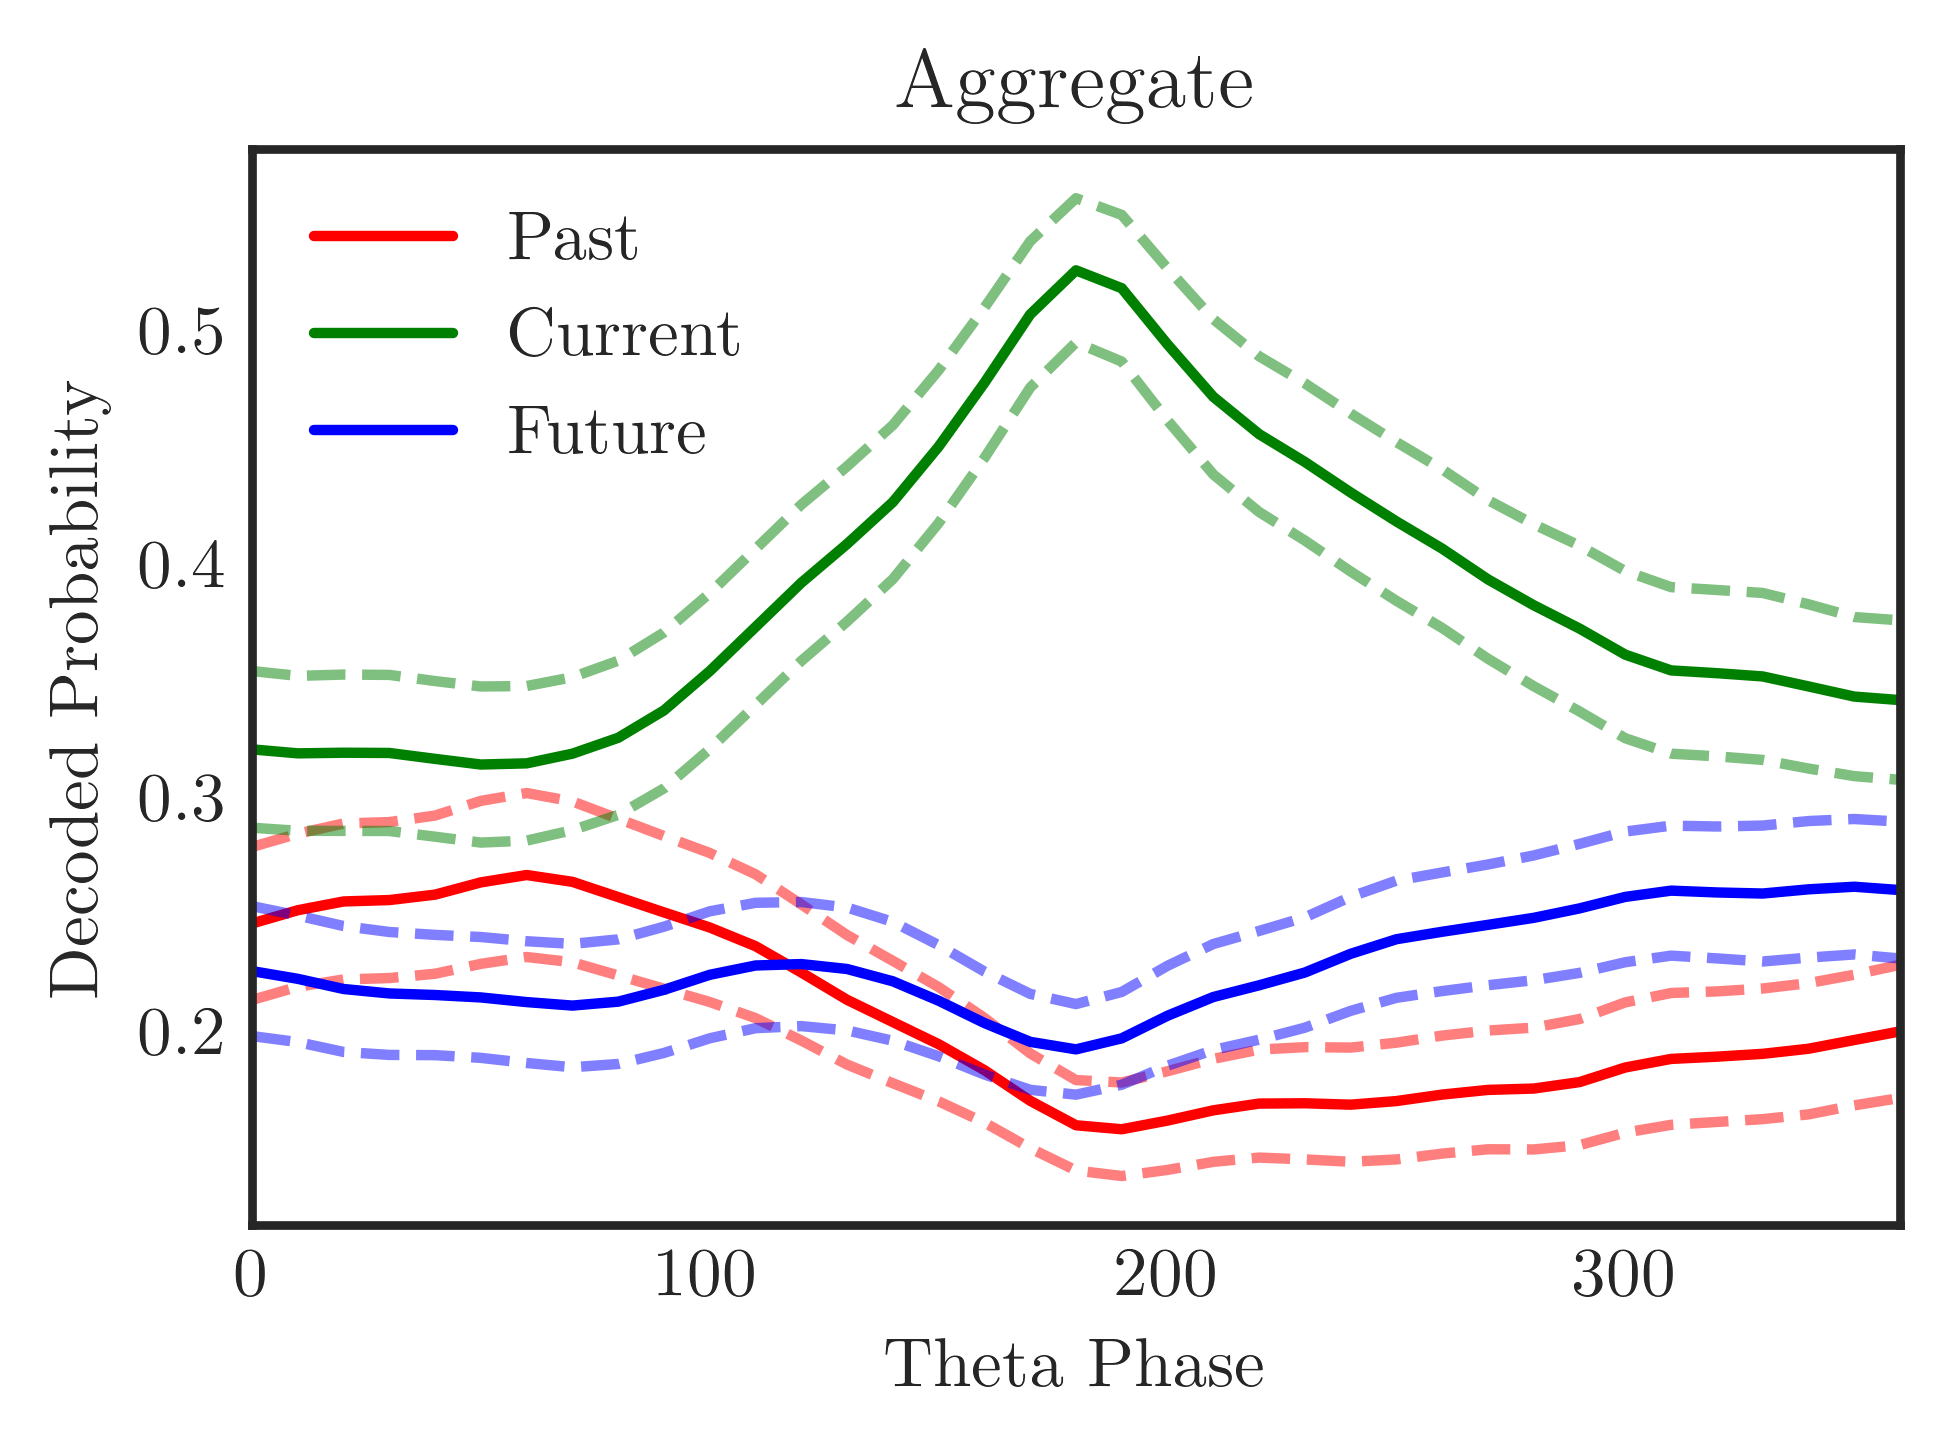

In [33]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=500)
rolling_decoding(odor_B_preds, odor_C_preds, 'Aggregate')
fig.tight_layout()
plt.savefig('theta_aggregate.png', dpi=500)
plt.savefig('theta_aggergate.eps', format='eps', dpi=500)
plt.show()